**LMS (Least Mean Squeares) Update Rule**

$$ \theta_j := \theta_j - \alpha * \frac{\partial}{\partial \theta_j} J(\theta)$$

It finds the partial derivative ($\frac{\partial}{\partial x}$) of the loss function with respect to each $\theta$ parameter.

A **Partial Derivative** indicates how much the total loss is increased or decreased if you increase $\theta$ parameter by a very small amount.

**Loss\Cost Function \ Gradient Descent**

$$J(\theta) = \frac{1}{2m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]²$$
$$= \frac{1}{2m}\sum_{i=1}^{m}[\theta_0 + \theta_1x^{(i)} - y^{(i)}]²$$

**Partial derivative of $\theta_0$**

$$\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{2m}2\sum_{i=1}^{m}[\theta_0 + \theta_1x^{(i)} - y^{(i)}][1 + 0 + 0]$$

$$= \frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]$$


**Partial derivative of $\theta_1$**

$$\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{2m}2\sum_{i=1}^{m}[\theta_0 + \theta_1x^{(i)} - y^{(i)}][0 + x^{(i)} + 0]$$

$$= \frac{1}{m}\sum_{i=1}^{m}[h_\theta(x^{(i)}) - y^{(i)}]x^{(i)}$$


**Least Mean Squares per parameter $\theta_0$ & $\theta_1$**

$$\theta_0 = \theta_0 - \alpha * \frac{\partial J(\theta)}{\partial \theta_0}$$
$$\theta_1 = \theta_1 - \alpha * \frac{\partial J(\theta)}{\partial \theta_1}$$

### Implementation

In [22]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")
from IPython.display import Markdown as md

**Data Generation**

In [2]:
def generate_dataset(m):
    X = np.random.randn(m) * 10 # standar deviation aprox. 10
    noise = np.random.randn(m) # Add noise
    y = 3*X + 1 + 5*noise
    return X,y

In [3]:
X, y = generate_dataset(m=100)

print("X mean:", X.mean(), "- X std:", X.std())
print("y mean:", y.mean(), "- y std:", y.std())
print(X.shape, y.shape)

X mean: -1.8052114415962266 - X std: 9.247661873928436
y mean: -4.690343184745864 - y std: 27.81458902144722
(100,) (100,)


In [4]:
def plot_data(X, y, color="orange", title="Data"):
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.scatter(X, y, c=color)
    plt.show()

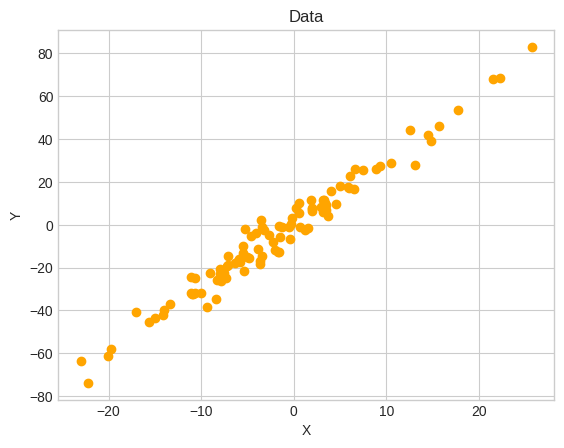

In [5]:
plot_data(X, y)

**Feature Scaling**

Why do we need to input features to be scaled or normalized?

- The update of $\theta$ parameters depends of $x^{i}$. Therefore the magnitud of $x^{i}$ will have an impact on the step size of the gradient descent.
- The difference in scales will cause different step sized for each feature. e.i. Age vs Salary.
- To ensure the gradient descent moves smoothly toward the minima and the steps for the gradient descent are updated at the same rate for all the features, the data is scaled before feeding it to the model.
- **Normalization**: Adjust the values measured on different scales to a common scale. **Min-Max**: scales the values within a range from 0 to 1.
- **Standardization**: The values are centered around the mean, with a unit standard deviation. The means of the attributes becomes **zero** and the resultant distribution has a unit standard deviation.

$$x = \frac{x - \mu}{\sigma}$$

In [6]:
def standardizeData(X):
    X = (X-X.mean()) / X.std()
    return X

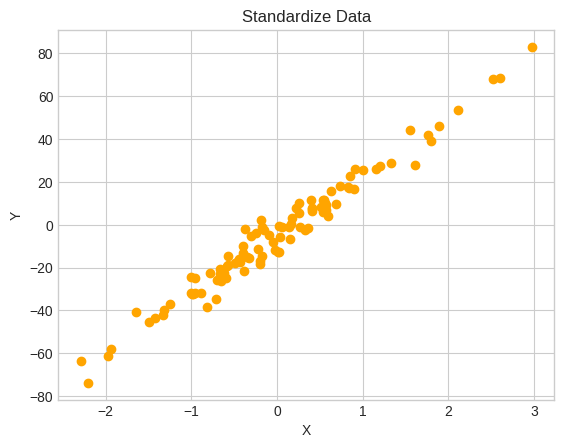

In [7]:
X = standardizeData(X)
plot_data(X=X, y=y, title="Standardize Data")

In [8]:
print("Mean:", X.mean(), "Standard Deviation:", X.std())

Mean: 4.440892098500626e-18 Standard Deviation: 1.0


**Train Test Split**

In [9]:
def trainTestSplit(X, y, split=0.8):
    m = X.shape[0]
    data = np.zeros((m, 2))
    data[:, 0] = X
    data[:, 1] = y
    np.random.shuffle(data)
    
    split = int(m*split)
    
    # Train
    XT = data[:split, 0]
    yT = data[:split, 1]
    # Test
    Xt = data[split:, 0]
    yt = data[split:, 1]
    
    return XT, yT, Xt, yt

In [10]:
XT, yT, Xt, yt = trainTestSplit(X, y)

print("XT:", XT.shape, "yT:", yT.shape)
print("Xt:", Xt.shape, "yt:", yt.shape)

XT: (80,) yT: (80,)
Xt: (20,) yt: (20,)


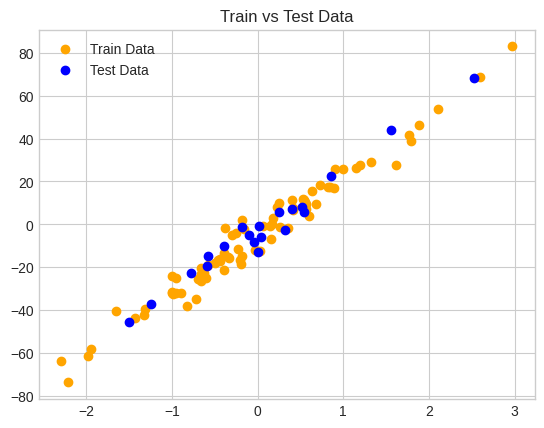

In [11]:
plt.title("Train vs Test Data")
plt.scatter(XT, yT, color="orange", label="Train Data")
plt.scatter(Xt, yt, color="blue", label="Test Data")
plt.legend()
plt.show()

**Modelling**

In [12]:
def hypothesis(X, theta):
    return theta[0] + theta[1] * X


def error(X, y, theta):
    m = X.shape[0]
    e = 0
    for i in range(m):
        y_i = hypothesis(X[i], theta)
        e = e + (y[i] - y_i)**2
    return e/(2*m) 


def gradient(X, y, theta):
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        exp = hypothesis(X[i], theta) - y[i]
        grad[0] += exp
        grad[1] += exp * X[i]
    return grad/m


def train(X, y, learning_rate=0.01, maxItrs=100):
    theta = np.zeros((2,))
    error_list = []
    for i in range(maxItrs):
        grad = gradient(X, y, theta)
        error_list.append(error(X, y, theta))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
    plt.plot(error_list)
    plt.title("Error")
    plt.xlabel("Iteration")
    plt.ylabel("Loss/Error")
    return theta
        

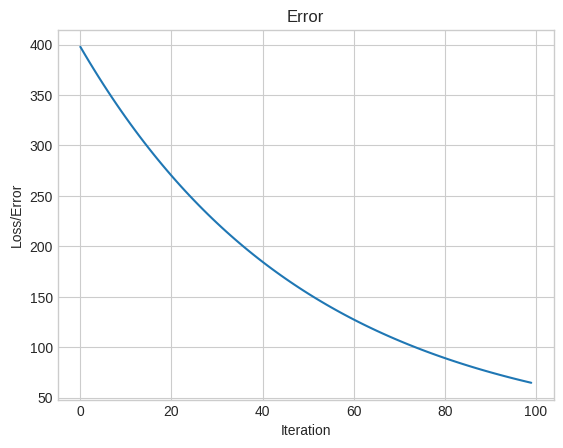

In [13]:
theta = train(X, y)

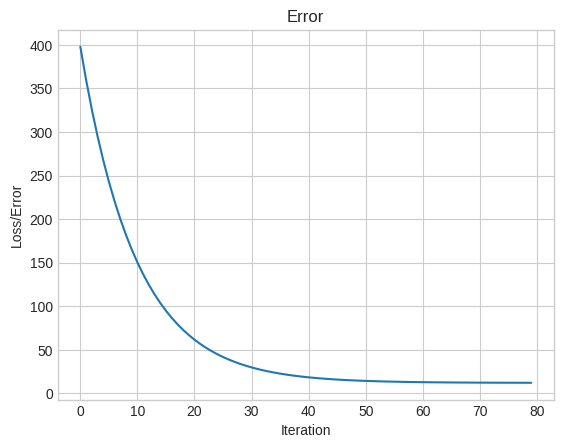

In [14]:
theta = train(X, y, learning_rate=0.05, maxItrs=80)

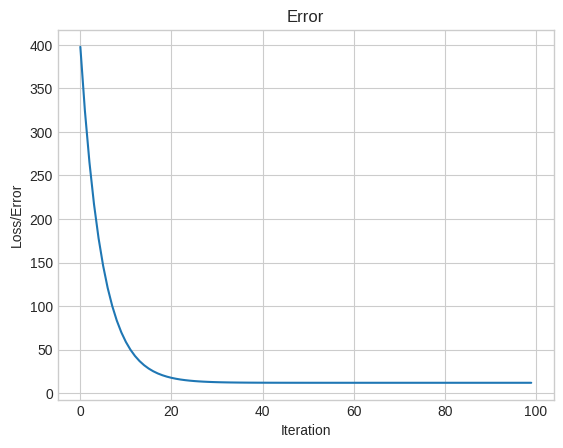

In [15]:
theta = train(X, y, learning_rate=0.1)

**Prediction**

In [16]:
theta

array([-4.6902186 , 27.38299695])

In [17]:
def predict(X, theta):
    return hypothesis(X, theta)

In [18]:
yp = predict(Xt, theta)
print("Training data:", Xt.shape, "Predicted data:", yp.shape)

Training data: (20,) Predicted data: (20,)


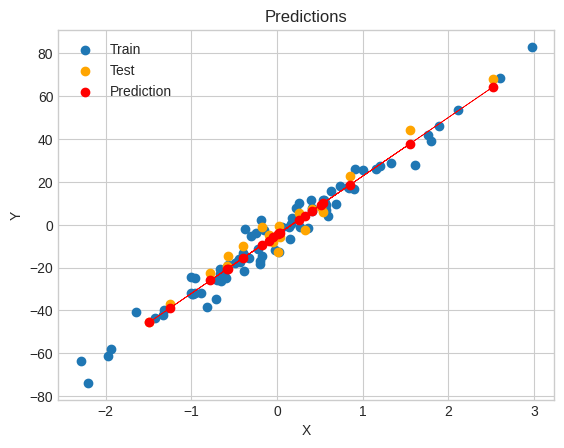

In [19]:
plt.title("Predictions")
plt.scatter(XT, yT, label="Train")
plt.scatter(Xt, yt, color="orange", label="Test")
plt.scatter(Xt, yp, color="red", label="Prediction")
plt.plot(Xt, yp, color="red", linewidth=0.5)
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

**R2 Score**

Coefficient of determination is a statistical measure of how well the regression predictions aproximate the real data points.

An $R2$ score has a range between 0 and 1. $R2 = 1$ means the predicted points fit 100% the real target points, which indicates the regression predictions prefectly fit the data, while $R2 = 0$ means 0% of accuracy.

$$R2 Score = 1 - \frac{T1}{T2}$$

$T1$: Distances of the target data points from the predicted data points (Projected Line).

$$\sum_{i=1}^{m}(y^{(i)} - ŷ^{(i)})²$$

$T2$: Distances of the target data points from the mean.

$$\sum_{i=1}^{m}(y^{(i)} - \overline{y})²$$

$$R2 = 1 - \frac{\sum_{i=1}^{m}(y^{(i)} - ŷ^{(i)})²}{\sum_{i=1}^{m}(y^{(i)} - \overline{y})²}$$

In [20]:
def r2_score(y, yp):
    t1 = np.sum((y - yp)**2)
    t2 = np.sum((y - y.mean())**2)
    return 1 - (t1/t2)

In [21]:
r2 = r2_score(yt, yp)

print("R2 Score:", r2, "=", f"{round(r2*100, 2)}%")

R2 Score: 0.9678864449060994 = 96.79%


In [24]:
md(f"**Interpretation**: The model has an accuracy of $\\approx$ {r2} %")

**Interpretation**: The model has an accuracy of $\approx$ 0.9678864449060994 %

**Visualizing the training process (example)**

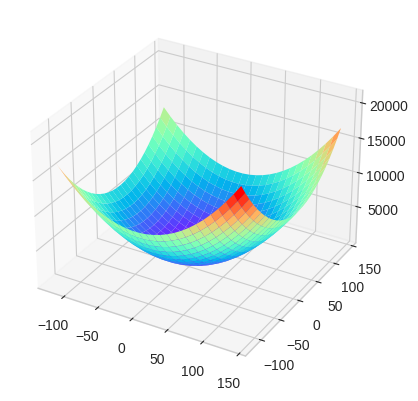

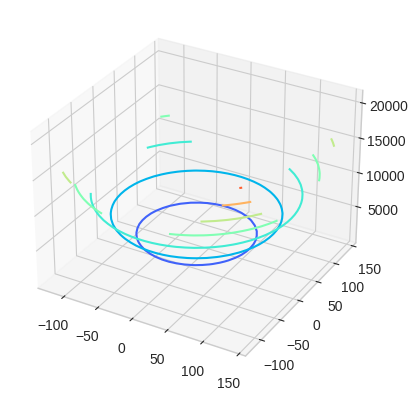

In [44]:
T0 = np.arange(-120, 150, 10)
T1 = np.arange(-120, 150, 10)

T0, T1 = np.meshgrid(T0, T1)
J =  np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        yp = T1[i,j] * X + T0[i,j]
        J[i,j] = np.mean((y - yp)**2) / 2


fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.plot_surface(T0, T1, J, cmap='rainbow')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(projection='3d')
axes.contour(T0, T1, J, cmap='rainbow')
plt.show()

**Implementation: Trace the trajectory of the Gradient**

In [77]:
def train(X, y, learning_rate=0.1, maxItrs=100, min_theta=-150, max_theta=100):
    theta = np.array([min_theta, max_theta])
    error_list = []
    
    # Values of theta
    theta_list = []
    
    for i in range(maxItrs):
        grad = gradient(X, y, theta)
        error_list.append(error(X, y, theta))
        theta_list.append((theta[0], theta[1]))
        theta[0] = theta[0] - learning_rate * grad[0]
        theta[1] = theta[1] - learning_rate * grad[1]
        
    return theta, np.array(theta_list), error_list
        

In [112]:
def plot_trajectory(T0s, T1s, X, y, error_list):
    _T0s, _T1s = np.meshgrid(T0s, T1s)
    J =  np.zeros(_T0s.shape)
    for i in range(J.shape[0]):
        for j in range(J.shape[1]):
            yp = _T0s[i,j] + _T1s[i,j] * X
            J[i,j] = np.mean((y - yp)**2) / 2

    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.plot_surface(_T0s, _T1s, J, cmap='rainbow')
    plt.show()

    fig = plt.figure()
    axes = fig.add_subplot(projection='3d')
    axes.contour(_T0s, _T1s, J, cmap='rainbow')
    axes.scatter(T0s, T1s, error_list)
    plt.show()

    plt.contour(_T0s, _T1s, J, cmap='rainbow')
    plt.scatter(T0s, T1s, marker='^', label='trajectory')
    plt.legend()
    plt.show()

In [113]:
min_theta=-120
max_theta=100
theta, theta_list, error_list = train(XT, 
                                      yT, 
                                      min_theta=min_theta, 
                                      max_theta=max_theta)

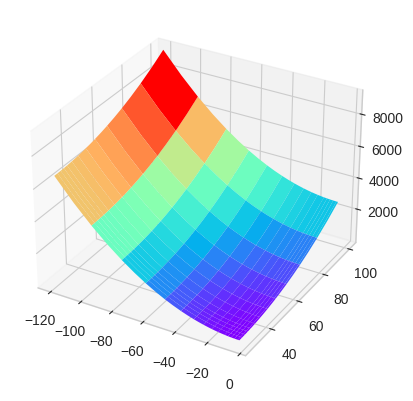

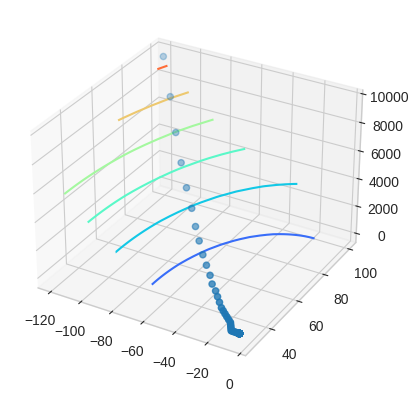

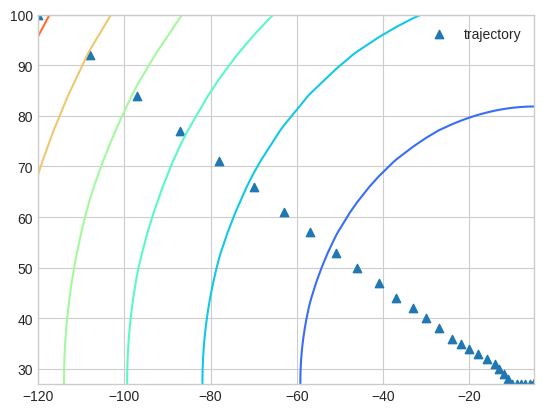

In [114]:
plot_trajectory(T0s=theta_list[:, 0], 
                T1s=theta_list[:, 1], 
                X=X, 
                y=y, 
                error_list=error_list)